### **Importing the libraries and loading the data**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [40]:
df_cust =  pd.read_csv('CustomerSentiment.csv')
df_cust.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


### **Data Preprocessing**

In [4]:
print("Shape of the dataframe is",df_cust.shape)
print("The number of NULL in each columns\ are \n", df_cust.isnull().sum())


Shape of the dataframe is (14640, 3)
The number of NULL in each columns\ are 
 airline_sentiment    0
airline              0
text                 0
dtype: int64


In [5]:
df_cust['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# **Exploratory Data Analysis**

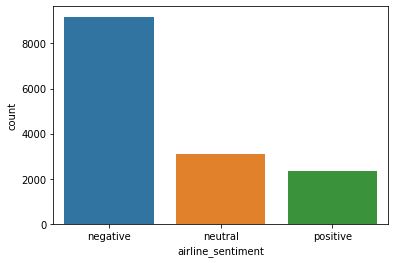

In [6]:
# This shows that airlines received more 'Negative' comments than 'Neutral' and 'Positive' comments
sns.countplot(x='airline_sentiment',data=df_cust,order=['negative','neutral','positive'])
plt.show()


###**Airline sentiments for each airline**
1.   United, US Airways, American airlines substantially get negative reactions
2.   Feedback for Virgin America are the most balanced




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


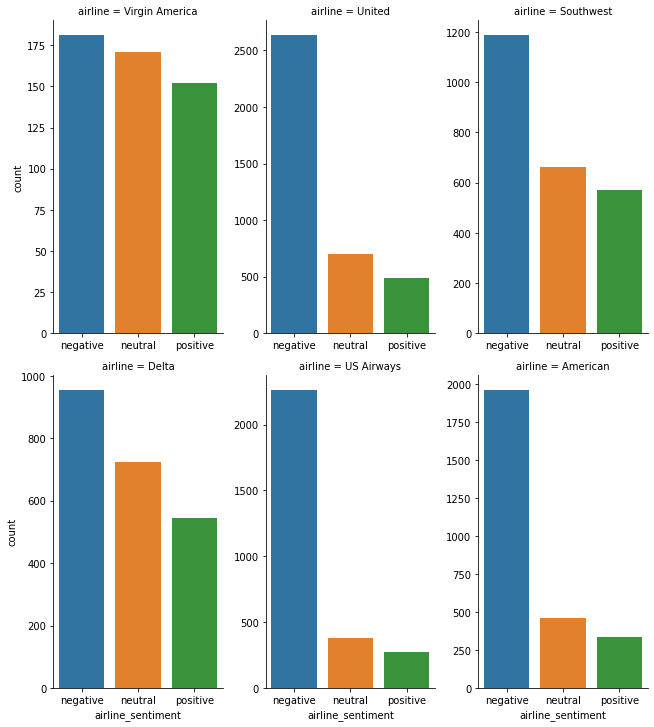

In [41]:
sns.factorplot(x = 'airline_sentiment',data=df_cust,
               order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',size=5,aspect=0.6,sharex=False,sharey=False)


**Replacing the categorical values of 'airline_sentiment' to numeric values**

In [42]:
df_cust['airline_sentiment'].replace(('negative','neutral', 'positive'), (-1, 0, 1), inplace=True)
df_cust['airline_sentiment'].value_counts()


-1    9178
 0    3099
 1    2363
Name: airline_sentiment, dtype: int64

#**Data Cleaning**

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

**Removing twitter handles (@user)**

In [10]:
df_cust['cleaned_text'] = np.vectorize(remove_pattern)(df_cust['text'], "@[\w]*")


**Removing special characters, numbers, punctuations**

In [11]:
df_cust['cleaned_text'] = df_cust['cleaned_text'].str.replace("[^a-zA-Z#]", " ")
 

**Removing short words**

In [12]:
df_cust['cleaned_text'] = df_cust['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [13]:
df_cust.head()

,airline_sentiment,airline,text,cleaned_text
0,0,Virgin America,@VirginAmerica What @dhepburn said.,What said
1,1,Virgin America,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,0,Virgin America,@VirginAmerica I didn't today... Must mean I n...,didn today Must mean need take another trip
3,-1,Virgin America,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,-1,Virgin America,@VirginAmerica and it's a really big bad thing...,really thing about


**Tokenization**

In [14]:
tokenized_text = df_cust['cleaned_text'].apply(lambda x: x.split())
tokenized_text.head()


0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: cleaned_text, dtype: object

**Stemming**

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_text.head()

0                                         [what, said]
1                   [plu, ad, commerci, experi, tacki]
2    [didn, today, must, mean, need, take, anoth, t...
3    [realli, aggress, blast, obnoxi, entertain, yo...
4                               [realli, thing, about]
Name: cleaned_text, dtype: object

In [16]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])

df_cust['cleaned_text'] = tokenized_text


**Common words used in the Customer's Feedback**

Most common words are 'Flight', 'Thanks', 'Cancel', 'Delay','help' etc

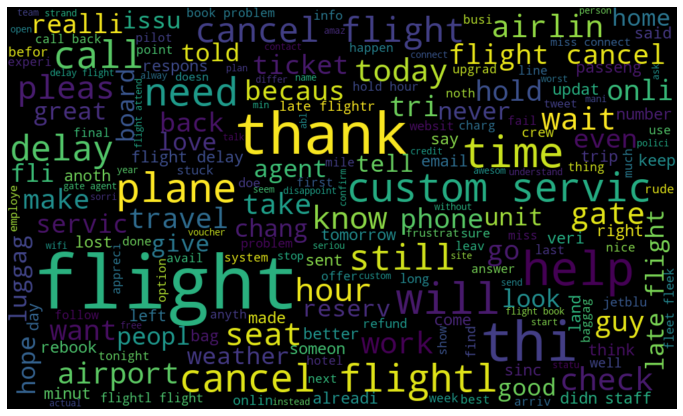

In [17]:
all_words = ' '.join([text for text in df_cust['cleaned_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**Common words used when Customer's Feedback was Positive**


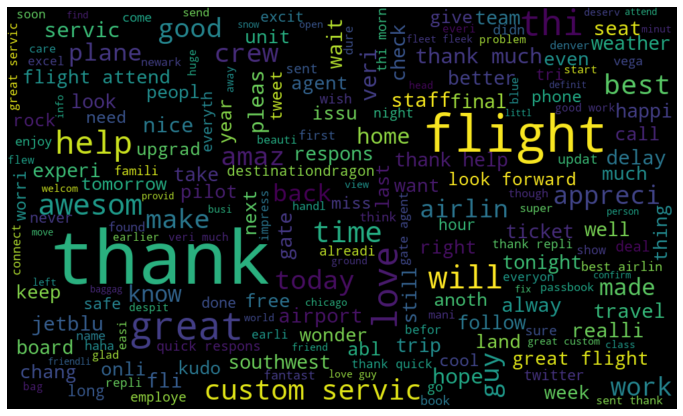

In [18]:
Positive_words = ' '.join([text for text in df_cust['cleaned_text'][df_cust['airline_sentiment']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=110).generate(Positive_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**Common words used when Customer's Feedback was Negative**

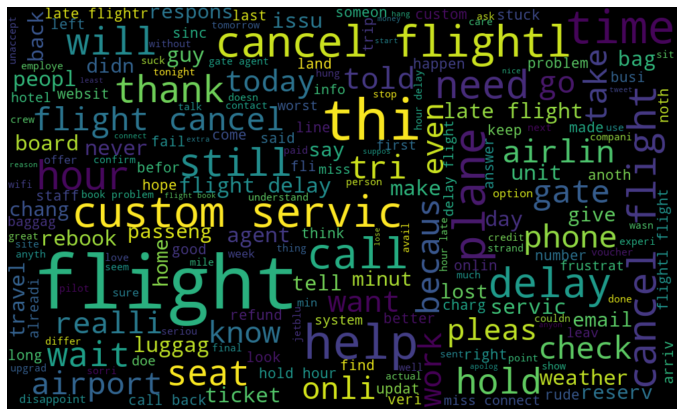

In [19]:
Negative_words = ' '.join([text for text in df_cust['cleaned_text'][df_cust['airline_sentiment']==-1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=110).generate(Negative_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**Undestanding the impact of HashTag**

In [20]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags


**Positive frequent HashTag's**

In [32]:
HT_positive = hashtag_extract(df_cust['cleaned_text'][df_cust['airline_sentiment']==1])
HT_positive = sum(HT_positive,[])


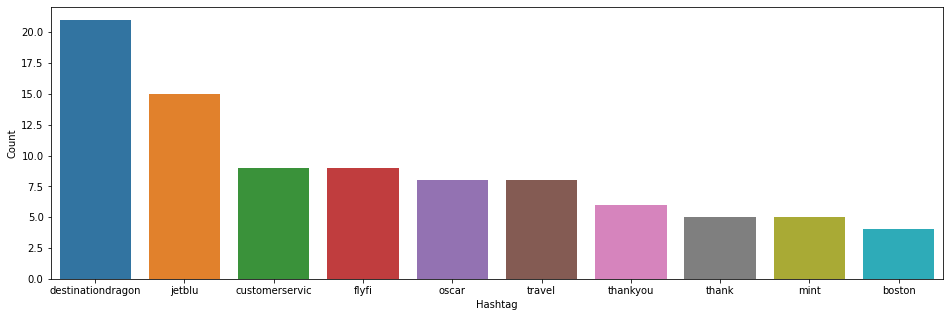

In [33]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 Positive frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


**Negative frequent HashTag's** 

In [36]:
HT_negative = hashtag_extract(df_cust['cleaned_text'][df_cust['airline_sentiment']==-1])
HT_negative = sum(HT_negative,[])


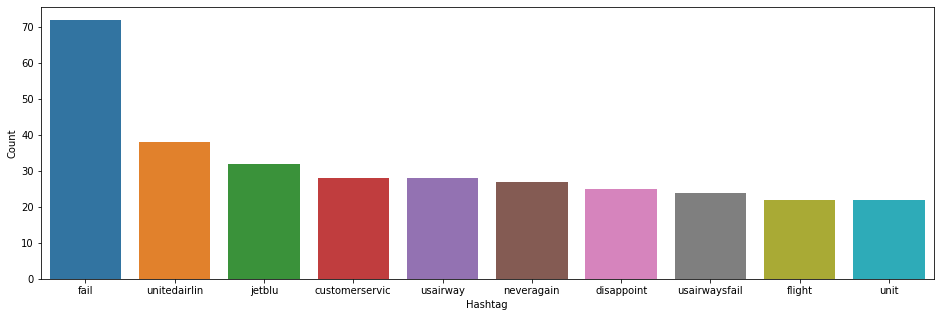

In [37]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 Negative frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


#**Extracting Features from customer feedback**

**Bag-of_Word Features**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words features
bow = bow_vectorizer.fit_transform(df_cust['cleaned_text'])

**TF-IDF Features**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF features 
tfidf = tfidf_vectorizer.fit_transform(df_cust['cleaned_text'])

**Model Buidling**

**Fit the Random forest Model on Bag-of-Words Features**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, roc_auc_score

# splitting data into training and test set
xtrain, xtest, ytrain, ytest = train_test_split(bow, df_cust['airline_sentiment'], random_state=11, test_size=0.3)

rf = RandomForestClassifier(criterion = "gini",n_estimators=500,random_state=21)
rf.fit(xtrain, ytrain) # training the model

rf_prediction = rf.predict(xtest) # predicting on the validation set
print("Random Forest", classification_report(ytest, rf_prediction)) 


Random Forest               precision    recall  f1-score   support

          -1       0.81      0.86      0.83      2760
           0       0.55      0.49      0.52       922
           1       0.69      0.62      0.65       710

    accuracy                           0.74      4392
   macro avg       0.68      0.66      0.67      4392
weighted avg       0.74      0.74      0.74      4392



In [26]:
print("F1-Score_RandomForest",f1_score(ytest, rf_prediction, average='micro')) # calculating f1 score

F1-Score_RandomForest 0.743169398907104


**Fit the Random forest Model on TF-IDF Features**

In [27]:
train_tfidf = tfidf[:14640,:]
test_tfidf = tfidf[14640:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xtest_tfidf = train_tfidf[ytest.index]

rf_tfidf = RandomForestClassifier(criterion = "gini",n_estimators=500,random_state=21)
rf_tfidf.fit(xtrain_tfidf, ytrain) # training the model

rf_pred_tfidf = rf_tfidf.predict(xtest_tfidf) # predicting on the test set
print("Random Forest", classification_report(ytest, rf_pred_tfidf))
print("F1-Score_RandomForest",f1_score(ytest, rf_pred_tfidf, average='micro')) # calculating f1 score 


Random Forest               precision    recall  f1-score   support

          -1       0.79      0.90      0.84      2760
           0       0.58      0.43      0.49       922
           1       0.72      0.59      0.65       710

    accuracy                           0.75      4392
   macro avg       0.70      0.64      0.66      4392
weighted avg       0.74      0.75      0.74      4392

F1-Score_RandomForest 0.7506830601092896


**Fit the XGBoost Model on Bag-of-Words Features**

In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xtest)

print("XGBoost", classification_report(ytest, xgb_pred))
print("F1-Score_XGBoost",f1_score(ytest, xgb_pred, average='micro')) # calculating f1 score 




XGBoost               precision    recall  f1-score   support

          -1       0.82      0.89      0.86      2760
           0       0.61      0.52      0.56       922
           1       0.74      0.65      0.69       710

    accuracy                           0.77      4392
   macro avg       0.73      0.69      0.70      4392
weighted avg       0.77      0.77      0.77      4392

F1-Score_XGBoost 0.7745901639344261


**Fit the XGBoost Model on TF-TDF Features**

In [30]:
xgb_tfidf = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_tfidf.fit(xtrain_tfidf, ytrain) # training the model

xgb_pred_tfidf = xgb_tfidf.predict(xtest_tfidf) # predicting on the test set
print("XGBoost TFIDF", classification_report(ytest, xgb_pred_tfidf))
print("F1-Score_XGBoost_TFIDF",f1_score(ytest, xgb_pred_tfidf, average='micro')) # calculating f1 score 


XGBoost TFIDF               precision    recall  f1-score   support

          -1       0.81      0.89      0.85      2760
           0       0.61      0.50      0.55       922
           1       0.74      0.63      0.68       710

    accuracy                           0.77      4392
   macro avg       0.72      0.67      0.69      4392
weighted avg       0.76      0.77      0.76      4392

F1-Score_XGBoost_TFIDF 0.767304189435337


#**Model Evaluation**

We have used '**Random Forest**' and '**XGBoost**' algorithms to fit the Model. and Features we have used are derived from '**Bag-of-Word**' and '**TF-IDF**'. Below is summary showing **F1-Score** for different models and feature-sets:


1.   Random Forest with Bag-of-Word - **F1-score- 0.743169**
2.   Random Forest with TF-IDF - **F1-score- 0.750687**
3.   XGBoost with Bag-of-Word - **F1-score- 0.774590**
4.   XGBoost  with TF-IDF - **F1-score- 0.7673044**

**XGBoost with Bag-of-Word** is the best model for this problem

#**What else can be tried?**

1.   Word2vec, Doc2vec, wordembedding to create new feature-sets 
2.   Hyperparamer and cross validation to improved the accuracy
3.   Can try with more algorithms 
2.   instead of Stemming can be tried with Lemmitization



